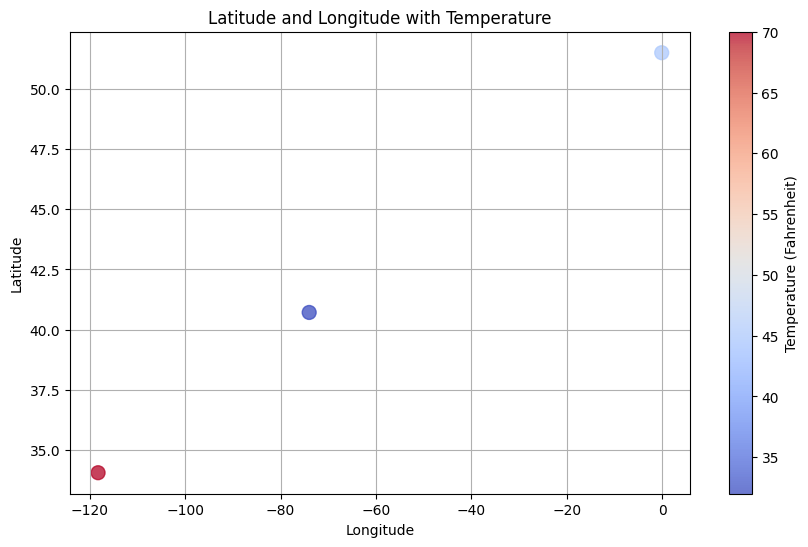

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: latitude, longitude, and temperature
latitude = [40.7128, 34.0522, 51.5074]  # Example latitude coordinates (e.g., New York, Los Angeles, London)
longitude = [-74.0060, -118.2437, -0.1276]  # Example longitude coordinates
temperature = [32, 70, 45]  # Example temperature data (in Fahrenheit)

# Plotting latitude and longitude with temperature as the color
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c=temperature, s=100, cmap='coolwarm', alpha=0.75)

# Adding colorbar and labels
cbar = plt.colorbar()
cbar.set_label('Temperature (Fahrenheit)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude and Longitude with Temperature')

# Display the plot
plt.grid(True)
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

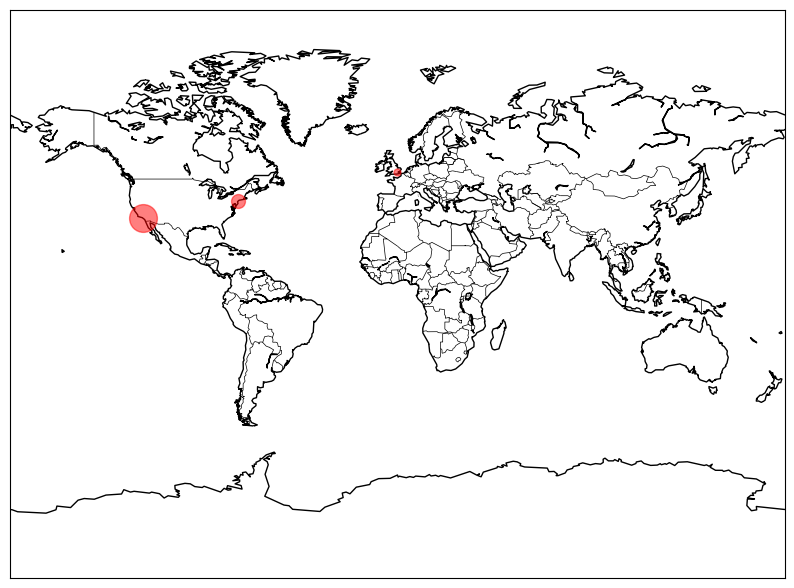

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create a figure and axis
plt.figure(figsize=(10, 8))

# Define the map boundaries
map = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
              llcrnrlon=-180,urcrnrlon=180,resolution='c')

# Draw coastlines and country boundaries
map.drawcoastlines()
map.drawcountries()

# Define some cities with their latitude, longitude, and temperature
cities = {
    'New York': (40.7128, -74.0060, 10),  # Example temperature: 10°C
    'Los Angeles': (34.0522, -118.2437, 20),  # Example temperature: 20°C
    'London': (51.5074, -0.1278, 5),  # Example temperature: 5°C
    # Add more cities as needed
}

# Plot cities on the map with temperature-based color coding
for city, (lat, lon, temp) in cities.items():
    x, y = map(lon, lat)
    map.plot(x, y, 'ro', markersize=temp, alpha=0.5)  # Adjust size based on temperature

# Add a colorbar legend
plt.colorbar(label='Temperature (°C)')

# Add a title
plt.title('Temperature Distribution in Selected Cities')

# Show the plot
plt.show()
